<a href="https://colab.research.google.com/github/AllanHigorLP/Atividade_avaliativa-2.2-RNA/blob/main/PP2_2_3_Valida%C3%A7%C3%A3o_Cruzada_e_Busca_em_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta parte do Projeto Prático diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você dseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [1]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neural_network import MLPClassifier #Importing MLPClassifier for classification.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covtype.csv')
print(df)

        Elevation  Aspect  Slope  ...  Soil_Type39  Soil_Type40  Cover_Type
0            2596      51      3  ...            0            0           5
1            2590      56      2  ...            0            0           5
2            2804     139      9  ...            0            0           2
3            2785     155     18  ...            0            0           2
4            2595      45      2  ...            0            0           5
...           ...     ...    ...  ...          ...          ...         ...
581007       2396     153     20  ...            0            0           3
581008       2391     152     19  ...            0            0           3
581009       2386     159     17  ...            0            0           3
581010       2384     170     15  ...            0            0           3
581011       2383     165     13  ...            0            0           3

[581012 rows x 55 columns]


#Top-6 Redes Neurais

*Todas as redes foram utilizadas atributos categóricos*
<br>
 *15 iterações para cada rede*

> 1  MLPClassifier(hidden_layer_sizes=(18,),activation='relu',solver='adam',max_iter=200,verbose=False) 


1.  Desvio Padrão Acurácia: 0.004837331855592419 
2.  Média Acurácia: 0.7819732574505844 
3.  Desvio Padrão F-Score: 0.004968694586989982 
4.  Média F-Score: 0.7871313558581188

> 2  MLPClassifier(hidden_layer_sizes=(20,2),activation='logistic',solver='adam',max_iter=200,verbose=False)


1.  Desvio Padrão Acurácia: 0.004595462328076937 
2.  Média Acurácia: 0.7977889205067009 
3.  Desvio Padrão F-Score: 0.004225891361530557 
4.  Média F-Score: 0.8090454126397713

> 3  MLPClassifier(hidden_layer_sizes=(30,2),activation='logistic',solver='sgd',max_iter=200,verbose=False)


1.  Desvio Padrão Acurácia: 0.0015455243879525017
2.  Média Acurácia: 0.7729866593231748
3.  Desvio Padrão F-Score: 0.0017110890309555051
4.  Média F-Score: 0.7933167651758591

> 4  MLPClassifier(hidden_layer_sizes=(25,),activation='relu',solver='adam',max_iter=100,verbose=False)


1.  Desvio Padrão Acurácia: 0.002684156198906927 
2.  Média Acurácia: 0.8004046569977358 
3.  Desvio Padrão F-Score: 0.0027798568431532415 
4.  Média F-Score: 0.8048430283060533

> 5  MLPClassifier(hidden_layer_sizes=(25,),activation='logistic',solver='adam',max_iter=150,verbose=False)


1.  Desvio Padrão Acurácia: 0.0016524250994240585 
2.  Média Acurácia: 0.8169749403341289
3.  Desvio Padrão F-Score: 0.0014641748398979363 
4.  Média F-Score: 0.8198097986232895

> 6  MLPClassifier(hidden_layer_sizes=(25,),activation='logistic',solver='adam',max_iter=200,verbose=False)

1.  Desvio Padrão Acurácia: 0.0026828235112068715
2.  Média Acurácia: 0.8144754757970749
3.  Desvio Padrão F-Score: 0.0025181393096440946
4.  Média F-Score: 0.8181492495245729





In [4]:
Y = df['Cover_Type']
df.drop(["Cover_Type"],axis = 1,inplace=True)
X = df
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
print(X)

        Elevation  Aspect  Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
0            2596      51      3  ...            0            0            0
1            2590      56      2  ...            0            0            0
2            2804     139      9  ...            0            0            0
3            2785     155     18  ...            0            0            0
4            2595      45      2  ...            0            0            0
...           ...     ...    ...  ...          ...          ...          ...
581007       2396     153     20  ...            0            0            0
581008       2391     152     19  ...            0            0            0
581009       2386     159     17  ...            0            0            0
581010       2384     170     15  ...            0            0            0
581011       2383     165     13  ...            0            0            0

[581012 rows x 54 columns]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [7]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()


X_train_stand = (X_train - np.mean(X_train))/np.std(X_train)
X_test_stand = (X_test - np.mean(X_train))/np.std(X_train)

print(X_train_stand)
print(X_test_stand)

        Elevation    Aspect     Slope  ...  Soil_Type38  Soil_Type39  Soil_Type40
430716  -0.751448  1.711303 -1.349259  ...    -0.165399    -0.154859    -0.123971
283910  -0.111674 -0.095113 -0.547765  ...    -0.165399    -0.154859    -0.123971
260852  -0.683539  1.720245  0.253729  ...    -0.165399    -0.154859    -0.123971
521282   0.381559 -0.256080  1.589552  ...    -0.165399    -0.154859    -0.123971
195950   1.003462  1.335711 -0.814930  ...    -0.165399    -0.154859    -0.123971
...           ...       ...       ...  ...          ...          ...          ...
111733  -0.036617 -1.266600 -0.147018  ...    -0.165399    -0.154859    -0.123971
231511  -1.398370  1.460909  2.123881  ...    -0.165399    -0.154859    -0.123971
274679  -0.247492 -0.470704 -0.013436  ...    -0.165399    -0.154859    -0.123971
261410  -0.229622 -1.034091 -0.280601  ...    -0.165399    -0.154859    -0.123971
513535   0.971295 -0.765812  0.654475  ...    -0.165399    -0.154859    -0.123971

[406708 rows x 

In [8]:
rede1 = MLPClassifier(hidden_layer_sizes=(18,),activation='relu',solver='adam',max_iter=200)
rede2 = MLPClassifier(hidden_layer_sizes=(20,2),activation='logistic',solver='adam',max_iter=200)
rede3 = MLPClassifier(hidden_layer_sizes=(30,2),activation='logistic',solver='sgd',max_iter=200)
rede4 = MLPClassifier(hidden_layer_sizes=(25,),activation='relu',solver='adam',max_iter=100)
rede5 = MLPClassifier(hidden_layer_sizes=(25,),activation='logistic',solver='adam',max_iter=150)
rede6 = MLPClassifier(hidden_layer_sizes=(25,),activation='logistic',solver='adam',max_iter=200)

In [9]:
grid_values = {'solver':['sgd','adam'],'batch_size':[150,300,500],
              'learning_rate_init':[0.001,0.01],'n_iter_no_change':[10,20],
              'max_iter':[10,15,20]}

In [10]:
grids = []
Fscore = []



> Grid Search da Rede 1



In [ ]:
grids.append(GridSearchCV(rede1,grid_values,n_jobs=-1,scoring='f1_weighted'))
grids[0].fit(X_train_stand,Y_train)
Fscore.append(grids[0].score(X_train_stand,Y_train))
print("Melhores parâmetros: ",grids[0].best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Melhores parâmetros:  {'batch_size': 500, 'learning_rate_init': 0.01, 'max_iter': 20, 'n_iter_no_change': 20, 'solver': 'adam'}


In [ ]:
pd.DataFrame(grids[0].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate_init,param_max_iter,param_n_iter_no_change,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,23.476267,0.677361,0.163234,0.008645,150,0.001,10,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.733770,0.732584,0.732821,0.730309,0.737000,0.733297,0.002172,60
1,24.806022,0.176650,0.165715,0.002666,150,0.001,10,10,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.756108,0.756611,0.755688,0.755047,0.754032,0.755497,0.000894,45
2,23.021856,0.242152,0.168665,0.003354,150,0.001,10,20,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.735492,0.730638,0.725430,0.732760,0.731603,0.731185,0.003305,61
3,24.740581,0.151302,0.168438,0.008264,150,0.001,10,20,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.752726,0.763747,0.753172,0.755464,0.758321,0.756686,0.004051,39
4,34.385277,0.184569,0.165403,0.003042,150,0.001,15,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.743958,0.741763,0.735692,0.737342,0.736481,0.739048,0.003232,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,23.198727,0.161136,0.173397,0.003022,500,0.01,15,20,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.769552,0.771293,0.765656,0.766747,0.767046,0.768059,0.002059,2
68,29.400544,0.198306,0.176739,0.007075,500,0.01,20,10,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.756690,0.757642,0.750890,0.753903,0.754036,0.754632,0.002374,48
69,30.138399,0.166243,0.175981,0.003930,500,0.01,20,10,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.772888,0.770228,0.758379,0.770735,0.765854,0.767617,0.005153,4
70,29.059942,0.188276,0.170414,0.002296,500,0.01,20,20,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.757101,0.764886,0.755196,0.756848,0.755868,0.757980,0.003520,35




> Grid Search da Rede 2



In [ ]:
grids.append(GridSearchCV(rede2,grid_values,n_jobs=-1,scoring='f1_weighted'))
grids[1].fit(X_train_stand,Y_train)
Fscore.append(grids[1].score(X_train_stand,Y_train))
print("Melhores parâmetros: ",grids[1].best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Melhores parâmetros:  {'batch_size': 150, 'learning_rate_init': 0.01, 'max_iter': 20, 'n_iter_no_change': 10, 'solver': 'adam'}


In [ ]:
pd.DataFrame(grids[1].cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate_init,param_max_iter,param_n_iter_no_change,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,27.574091,0.255418,0.212734,0.008630,150,0.001,10,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.672554,0.662853,0.669443,0.666026,0.606620,0.655499,0.024655,59
1,29.747428,0.165848,0.222351,0.002428,150,0.001,10,10,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.743775,0.748387,0.716214,0.722881,0.737569,0.733765,0.012288,34
2,27.073755,0.157060,0.222638,0.003127,150,0.001,10,20,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.634218,0.626549,0.651308,0.374704,0.656060,0.588568,0.107477,61
3,29.815072,0.071350,0.221374,0.003463,150,0.001,10,20,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.740105,0.737948,0.732491,0.738078,0.735707,0.736866,0.002593,31
4,40.872522,0.382395,0.223276,0.002165,150,0.001,15,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.676389,0.676930,0.672470,0.676762,0.673535,0.675217,0.001848,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,28.217109,0.117275,0.235641,0.008811,500,0.01,15,20,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.775713,0.775105,0.768958,0.770323,0.766456,0.771311,0.003574,10
68,37.319042,0.553241,0.234134,0.007062,500,0.01,20,10,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.717491,0.693170,0.717200,0.718034,0.718962,0.712971,0.009919,46
69,39.225861,0.842201,0.234729,0.008382,500,0.01,20,10,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.780181,0.762707,0.771119,0.777334,0.771777,0.772624,0.006010,7
70,36.640933,0.388689,0.231642,0.005753,500,0.01,20,20,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.717145,0.702732,0.717754,0.691421,0.690094,0.703830,0.011958,51




> Grid Search da Rede 3



In [ ]:
grids.append(GridSearchCV(rede3,grid_values,n_jobs=-1,scoring='f1_weighted'))
grids[2].fit(X_train_stand,Y_train)
Fscore.append(grids[2].score(X_train_stand,Y_train))
print("Melhores parâmetros: ",grids[2].best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Melhores parâmetros:  {'batch_size': 300, 'learning_rate_init': 0.01, 'max_iter': 20, 'n_iter_no_change': 10, 'solver': 'adam'}


In [ ]:
pd.DataFrame(grids[2].cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate_init,param_max_iter,param_n_iter_no_change,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,30.891039,0.221258,0.259750,0.010412,150,0.001,10,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.375563,0.674966,0.659611,0.410928,0.671931,0.558600,0.135571,60
1,33.143365,0.265213,0.269932,0.007500,150,0.001,10,10,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.751522,0.753916,0.738406,0.742548,0.748580,0.746994,0.005735,28
2,29.999858,0.239208,0.269826,0.003658,150,0.001,10,20,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.375371,0.665706,0.671173,0.670753,0.673435,0.611288,0.117986,59
3,32.481403,0.327825,0.277427,0.010432,150,0.001,10,20,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.740262,0.748123,0.744216,0.746138,0.747754,0.745299,0.002872,31
4,44.880379,0.236429,0.265842,0.001689,150,0.001,15,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.672072,0.679002,0.672654,0.675770,0.642237,0.668347,0.013287,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,31.462560,0.589718,0.274220,0.010332,500,0.01,15,20,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.781116,0.786984,0.791440,0.790841,0.791225,0.788321,0.003955,8
68,38.976039,0.362267,0.264827,0.002603,500,0.01,20,10,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.717623,0.716757,0.689165,0.717257,0.717137,0.711588,0.011215,48
69,41.542564,0.250773,0.272585,0.007095,500,0.01,20,10,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.790051,0.789781,0.798808,0.783359,0.787663,0.789932,0.005043,5
70,39.598696,0.238984,0.264039,0.003690,500,0.01,20,20,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.717263,0.716191,0.698375,0.715831,0.716294,0.712791,0.007224,47




> Grid Search da Rede 4



In [ ]:
grids.append(GridSearchCV(rede4,grid_values,n_jobs=-1,scoring='f1_weighted'))
grids[3].fit(X_train_stand,Y_train)
Fscore.append(grids[3].score(X_train_stand,Y_train))
print("Melhores parâmetros: ",grids[3].best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Melhores parâmetros:  {'batch_size': 500, 'learning_rate_init': 0.01, 'max_iter': 20, 'n_iter_no_change': 10, 'solver': 'adam'}


In [ ]:
pd.DataFrame(grids[3].cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate_init,param_max_iter,param_n_iter_no_change,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.791852,0.331330,0.184266,0.005841,150,0.001,10,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.734023,0.741783,0.737269,0.736608,0.735484,0.737033,0.002618,60
1,26.599571,0.152099,0.184128,0.003567,150,0.001,10,10,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.763932,0.768665,0.766358,0.774195,0.770166,0.768663,0.003480,40
2,24.525657,0.269156,0.189644,0.008319,150,0.001,10,20,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.740510,0.739280,0.736395,0.735808,0.732785,0.736956,0.002723,61
3,26.442357,0.146541,0.181985,0.005074,150,0.001,10,20,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.767899,0.771613,0.766920,0.768158,0.770392,0.768996,0.001733,39
4,36.643999,0.335408,0.179629,0.002777,150,0.001,15,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.745415,0.747954,0.739052,0.739131,0.746330,0.743576,0.003751,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,23.942885,0.084185,0.181740,0.002490,500,0.01,15,20,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.782049,0.782585,0.781171,0.778168,0.779414,0.780678,0.001653,7
68,31.417824,0.265973,0.184143,0.002098,500,0.01,20,10,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.769706,0.772488,0.771421,0.767094,0.772237,0.770589,0.002000,34
69,31.770678,0.187610,0.181460,0.001558,500,0.01,20,10,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.788463,0.778412,0.788880,0.780819,0.785122,0.784339,0.004142,1
70,30.507528,0.115037,0.182519,0.003208,500,0.01,20,20,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.766956,0.771552,0.768580,0.770837,0.771183,0.769822,0.001768,36




> Grid Search da Rede 5



In [ ]:
grids.append(GridSearchCV(rede5,grid_values,n_jobs=-1,scoring='f1_weighted'))
grids[4].fit(X_train_stand,Y_train)
Fscore.append(grids[4].score(X_train_stand,Y_train))
print("Melhores parâmetros: ",grids[4].best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Melhores parâmetros:  {'batch_size': 150, 'learning_rate_init': 0.01, 'max_iter': 20, 'n_iter_no_change': 20, 'solver': 'adam'}


In [ ]:
pd.DataFrame(grids[4].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate_init,param_max_iter,param_n_iter_no_change,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,25.629647,0.164773,0.232867,0.007956,150,0.001,10,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.700331,0.700900,0.695824,0.698455,0.697864,0.698675,0.001818,62
1,27.760959,0.153384,0.237523,0.002168,150,0.001,10,10,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.769947,0.775894,0.769829,0.772967,0.776049,0.772937,0.002721,31
2,25.748118,0.227060,0.240371,0.005305,150,0.001,10,20,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.699424,0.699904,0.697715,0.698758,0.698534,0.698867,0.000753,61
3,27.590785,0.115898,0.237911,0.001701,150,0.001,10,20,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.773160,0.770606,0.772775,0.773885,0.772942,0.772673,0.001101,32
4,38.374572,0.205535,0.243662,0.008442,150,0.001,15,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.704904,0.705992,0.702032,0.702671,0.704378,0.703995,0.001454,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,27.661934,0.082612,0.254670,0.007417,500,0.01,15,20,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.797559,0.799552,0.802733,0.801149,0.803386,0.800876,0.002125,8
68,35.168999,0.183290,0.241527,0.005754,500,0.01,20,10,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.740918,0.737833,0.733375,0.736530,0.738862,0.737504,0.002514,48
69,36.511808,0.173049,0.244621,0.003954,500,0.01,20,10,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.804905,0.805342,0.797928,0.805214,0.803285,0.803335,0.002802,3
70,35.444149,0.236811,0.246110,0.004396,500,0.01,20,20,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.735776,0.740132,0.732889,0.741196,0.738932,0.737785,0.003049,47




> Grid Search da Rede 6



In [ ]:
grids.append(GridSearchCV(rede6,grid_values,n_jobs=-1,scoring='f1_weighted'))
grids[5].fit(X_train_stand,Y_train)
Fscore.append(grids[5].score(X_train_stand,Y_train))
print("Melhores parâmetros: ",grids[5].best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Melhores parâmetros:  {'batch_size': 300, 'learning_rate_init': 0.01, 'max_iter': 20, 'n_iter_no_change': 20, 'solver': 'adam'}


In [ ]:
folds = pd.DataFrame(grids[5].cv_results_)
folds

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_learning_rate_init,param_max_iter,param_n_iter_no_change,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,26.051090,0.149460,0.229429,0.011089,150,0.001,10,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.699806,0.701346,0.696681,0.698734,0.696350,0.698583,0.001884,62
1,28.449658,0.292448,0.249537,0.009277,150,0.001,10,10,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.773570,0.769274,0.768458,0.773871,0.771938,0.771422,0.002204,32
2,26.132632,0.203015,0.238545,0.002139,150,0.001,10,20,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.701061,0.701123,0.699313,0.697527,0.699998,0.699804,0.001326,60
3,28.253776,0.116516,0.244146,0.013223,150,0.001,10,20,adam,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.773001,0.772714,0.769055,0.773907,0.775674,0.772870,0.002169,31
4,39.494713,0.246980,0.251256,0.017485,150,0.001,15,10,sgd,"{'batch_size': 150, 'learning_rate_init': 0.00...",0.705259,0.706453,0.701448,0.704552,0.703916,0.704326,0.001667,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,26.921644,0.128878,0.242332,0.005586,500,0.01,15,20,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.801573,0.802582,0.803719,0.798952,0.799287,0.801223,0.001849,6
68,34.479493,0.629861,0.239743,0.002302,500,0.01,20,10,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.738097,0.740207,0.739181,0.739204,0.730197,0.737377,0.003652,47
69,35.736001,0.236990,0.244060,0.007668,500,0.01,20,10,adam,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.806850,0.805431,0.799513,0.805495,0.800292,0.803516,0.003004,2
70,34.241900,0.163618,0.241007,0.004611,500,0.01,20,20,sgd,"{'batch_size': 500, 'learning_rate_init': 0.01...",0.739675,0.738646,0.734141,0.732052,0.741451,0.737193,0.003526,48


## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

In [11]:
rede1 = MLPClassifier(hidden_layer_sizes=(18,),activation='relu',solver='adam',batch_size= 500, learning_rate_init= 0.01, max_iter = 20, n_iter_no_change = 20)
rede2 = MLPClassifier(hidden_layer_sizes=(20,2),activation='logistic',solver='adam',batch_size= 150, learning_rate_init= 0.01, max_iter = 20, n_iter_no_change = 20)
rede3 = MLPClassifier(hidden_layer_sizes=(30,2),activation='logistic',solver='adam',batch_size= 300, learning_rate_init= 0.01, max_iter = 20, n_iter_no_change = 10)
rede4 = MLPClassifier(hidden_layer_sizes=(25,),activation='relu',solver='adam',batch_size= 500, learning_rate_init= 0.01, max_iter = 20, n_iter_no_change = 10)
rede5 = MLPClassifier(hidden_layer_sizes=(25,),activation='logistic',solver='adam',batch_size= 150, learning_rate_init= 0.01, max_iter = 20, n_iter_no_change = 20)
rede6 = MLPClassifier(hidden_layer_sizes=(25,),activation='logistic',solver='adam',batch_size= 300, learning_rate_init= 0.01, max_iter = 20, n_iter_no_change = 20)

rede1.fit(X_train_stand,Y_train)
Fscore.append(rede1.score(X_train_stand,Y_train))
rede2.fit(X_train_stand,Y_train)
Fscore.append(rede2.score(X_train_stand,Y_train))
rede3.fit(X_train_stand,Y_train)
Fscore.append(rede3.score(X_train_stand,Y_train))
rede4.fit(X_train_stand,Y_train)
Fscore.append(rede4.score(X_train_stand,Y_train))
rede5.fit(X_train_stand,Y_train)
Fscore.append(rede5.score(X_train_stand,Y_train))
rede6.fit(X_train_stand,Y_train)
Fscore.append(rede6.score(X_train_stand,Y_train))

print(Fscore)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

[0.774088535263629, 0.7918555818916766, 0.8124231635473116, 0.7926768098980104, 0.8086317456258544, 0.8056812258426193]


## Identificando a melhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto



> O modelo otimizado com o maior Fscore



In [12]:
maior_Score = max(Fscore)
print('Maior score foi', maior_Score, "da rede neural", Fscore.index(maior_Score)+1)

Maior score foi 0.8124231635473116 da rede neural 3




> Parâmetros do modelo



In [ ]:
grids[maior_Score].estimator



> Melhor combinação de Hiperparâmetros



In [ ]:
grids[maior_Score].best_params_



> Resultados para cada um dos Folds



In [ ]:
folds = pd.DataFrame(grids[maior_Score].cv_results_)
folds

## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

**Treine o modelo com todos os dados**

In [17]:
rede = MLPClassifier(hidden_layer_sizes=(30,2),activation='logistic',solver='adam',batch_size= 300, learning_rate_init= 0.01, max_iter = 20, n_iter_no_change = 10)
rede.fit(X_train_stand,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', batch_size=300, hidden_layer_sizes=(30, 2),
              learning_rate_init=0.01, max_iter=20)

**Salve o modelo em disco**

In [18]:
from joblib import dump, load
dump(rede, 'bestNN.joblib')

['bestNN.joblib']

**Construa uma rotina que recupere o modelo em disco**

In [19]:
rede = load('bestNN.joblib')
rede

MLPClassifier(activation='logistic', batch_size=300, hidden_layer_sizes=(30, 2),
              learning_rate_init=0.01, max_iter=20)

**Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas**

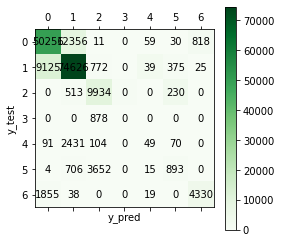

In [23]:
y_pred = rede.predict(X_test_stand)

conf_matrix = confusion_matrix(y_pred, Y_test)
plt.matshow(conf_matrix, cmap=plt.cm.Greens)

for (m, n), value in np.ndenumerate(conf_matrix):
    plt.text(m, n, f"{value}", va="center", ha="center")
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.colorbar()
plt.plot()
plt.show()